In [1]:
# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from scipy import stats
import missingno as msno
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')
import plotly.express as px
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'missingno'

In [288]:
# import urllib.request

train_path = pd.read_csv("/content/fifa21_male2.csv")
# TRAIN_URL = DOWNLOAD_ROOT + "datasets/players_20.csv"
# def fetch_train_data(train_url=TRAIN_URL, train_path=TRAIN_PATH):
#   os.makedirs(train_path, exist_ok=True)
#   csv_path = os.path.join(train_path, "players_20.csv")
#   urllib.request.urlretrieve(train_url, csv_path)

In [289]:
player_data = train_path
player_data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [290]:
player_data.shape

(17125, 107)

In [291]:
#player stat features
player_data.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [312]:
#player stat features
columns = ['Age','OVA','BOV','POT','Growth','Attacking','Crossing','Finishing','Heading Accuracy','Short Passing','Volleys','Skill','Dribbling','Curve','FK Accuracy','Long Passing','Ball Control','Movement','Acceleration','Sprint Speed','Agility','Reactions','Balance','Power','Shot Power','Jumping','Stamina','Strength','Long Shots','Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Defending','Marking','Standing Tackle','Sliding Tackle','Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes']
player_df = player_data[columns]
player_df.head()


,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,33,69,71,69,0,313,75,50,59,71,...,208,70,69,69.0,56,14,5,15,10,12
1,37,71,70,71,0,337,68,64,61,76,...,153,70,43,40.0,56,9,12,13,11,11
2,33,71,71,71,0,337,80,64,41,77,...,99,35,34,30.0,51,9,6,13,16,7
3,36,68,70,82,14,264,54,70,60,80,...,75,34,41,NaN,68,5,21,64,21,21
4,36,81,82,81,0,367,75,69,54,90,...,181,68,57,56.0,45,6,13,6,13,7


In [313]:
player_df['OVA'] = pd.to_numeric(player_df['OVA'], errors='coerce')
# player_df['Club'] = pd.to_numeric(player_df['Club'], errors='coerce')
# player_df['Nationality'] = pd.to_numeric(player_df['Nationality'], errors='coerce')
# player_df['Height'] = pd.to_numeric(player_df['Height'], errors='coerce')
# player_df['Weight'] = pd.to_numeric(player_df['Weight'], errors='coerce')
# player_df['Position'] = pd.to_numeric(player_df['Position'], errors='coerce')
# player_df['foot'] = pd.to_numeric(player_df['foot'], errors='coerce')
# player_df['BP'] = pd.to_numeric(player_df['BP'], errors='coerce')
# player_df['Value'] = pd.to_numeric(player_df['Value'], errors='coerce')

In [314]:
player_df = player_df[columns + ['Volleys','Curve','Agility','Balance','Jumping','Interceptions','Positioning','Vision','Composure','Sliding Tackle']].dropna()

In [315]:
player_df= player_df.reset_index()

In [316]:
player_df = player_df.loc[:,~player_df.columns.duplicated()]

In [317]:
label_encoder = LabelEncoder()

In [318]:
player_df['OVA'] = label_encoder.fit_transform(player_df['OVA'])

In [319]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16702 entries, 0 to 16701
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             16702 non-null  int64  
 1   Age               16702 non-null  int64  
 2   OVA               16702 non-null  int64  
 3   BOV               16702 non-null  int64  
 4   POT               16702 non-null  int64  
 5   Growth            16702 non-null  int64  
 6   Attacking         16702 non-null  int64  
 7   Crossing          16702 non-null  int64  
 8   Finishing         16702 non-null  int64  
 9   Heading Accuracy  16702 non-null  int64  
 10  Short Passing     16702 non-null  int64  
 11  Volleys           16702 non-null  float64
 12  Skill             16702 non-null  int64  
 13  Dribbling         16702 non-null  int64  
 14  Curve             16702 non-null  float64
 15  FK Accuracy       16702 non-null  int64  
 16  Long Passing      16702 non-null  int64 

In [320]:
player_df.describe()

,index,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
count,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000,...,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000,16702.000000
mean,8736.446234,25.154952,20.909352,67.853251,72.490839,5.581547,258.137708,51.515747,47.868459,53.469704,...,141.633996,47.275656,48.267812,46.090528,77.634116,15.622979,15.462998,15.334690,15.493833,15.719614
std,4868.194044,4.855193,6.829296,6.605168,5.727386,5.801728,72.193985,17.857048,19.384289,16.909538,...,61.467768,20.118354,21.455444,21.158310,81.197113,16.833805,16.132335,15.801371,16.383109,17.139523
min,1.000000,16.000000,0.000000,44.000000,47.000000,0.000000,42.000000,6.000000,3.000000,5.000000,...,20.000000,3.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4540.250000,21.000000,16.000000,64.000000,69.000000,0.000000,231.000000,40.000000,33.000000,46.000000,...,85.000000,30.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,8768.500000,25.000000,21.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,...,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,12948.750000,29.000000,26.000000,72.000000,76.000000,10.000000,305.000000,65.000000,63.000000,65.000000,...,194.000000,64.000000,66.000000,64.000000,59.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,17124.000000,53.000000,47.000000,93.000000,95.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,272.000000,94.000000,93.000000,95.000000,440.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In [321]:
player_df.shape

(16702, 47)

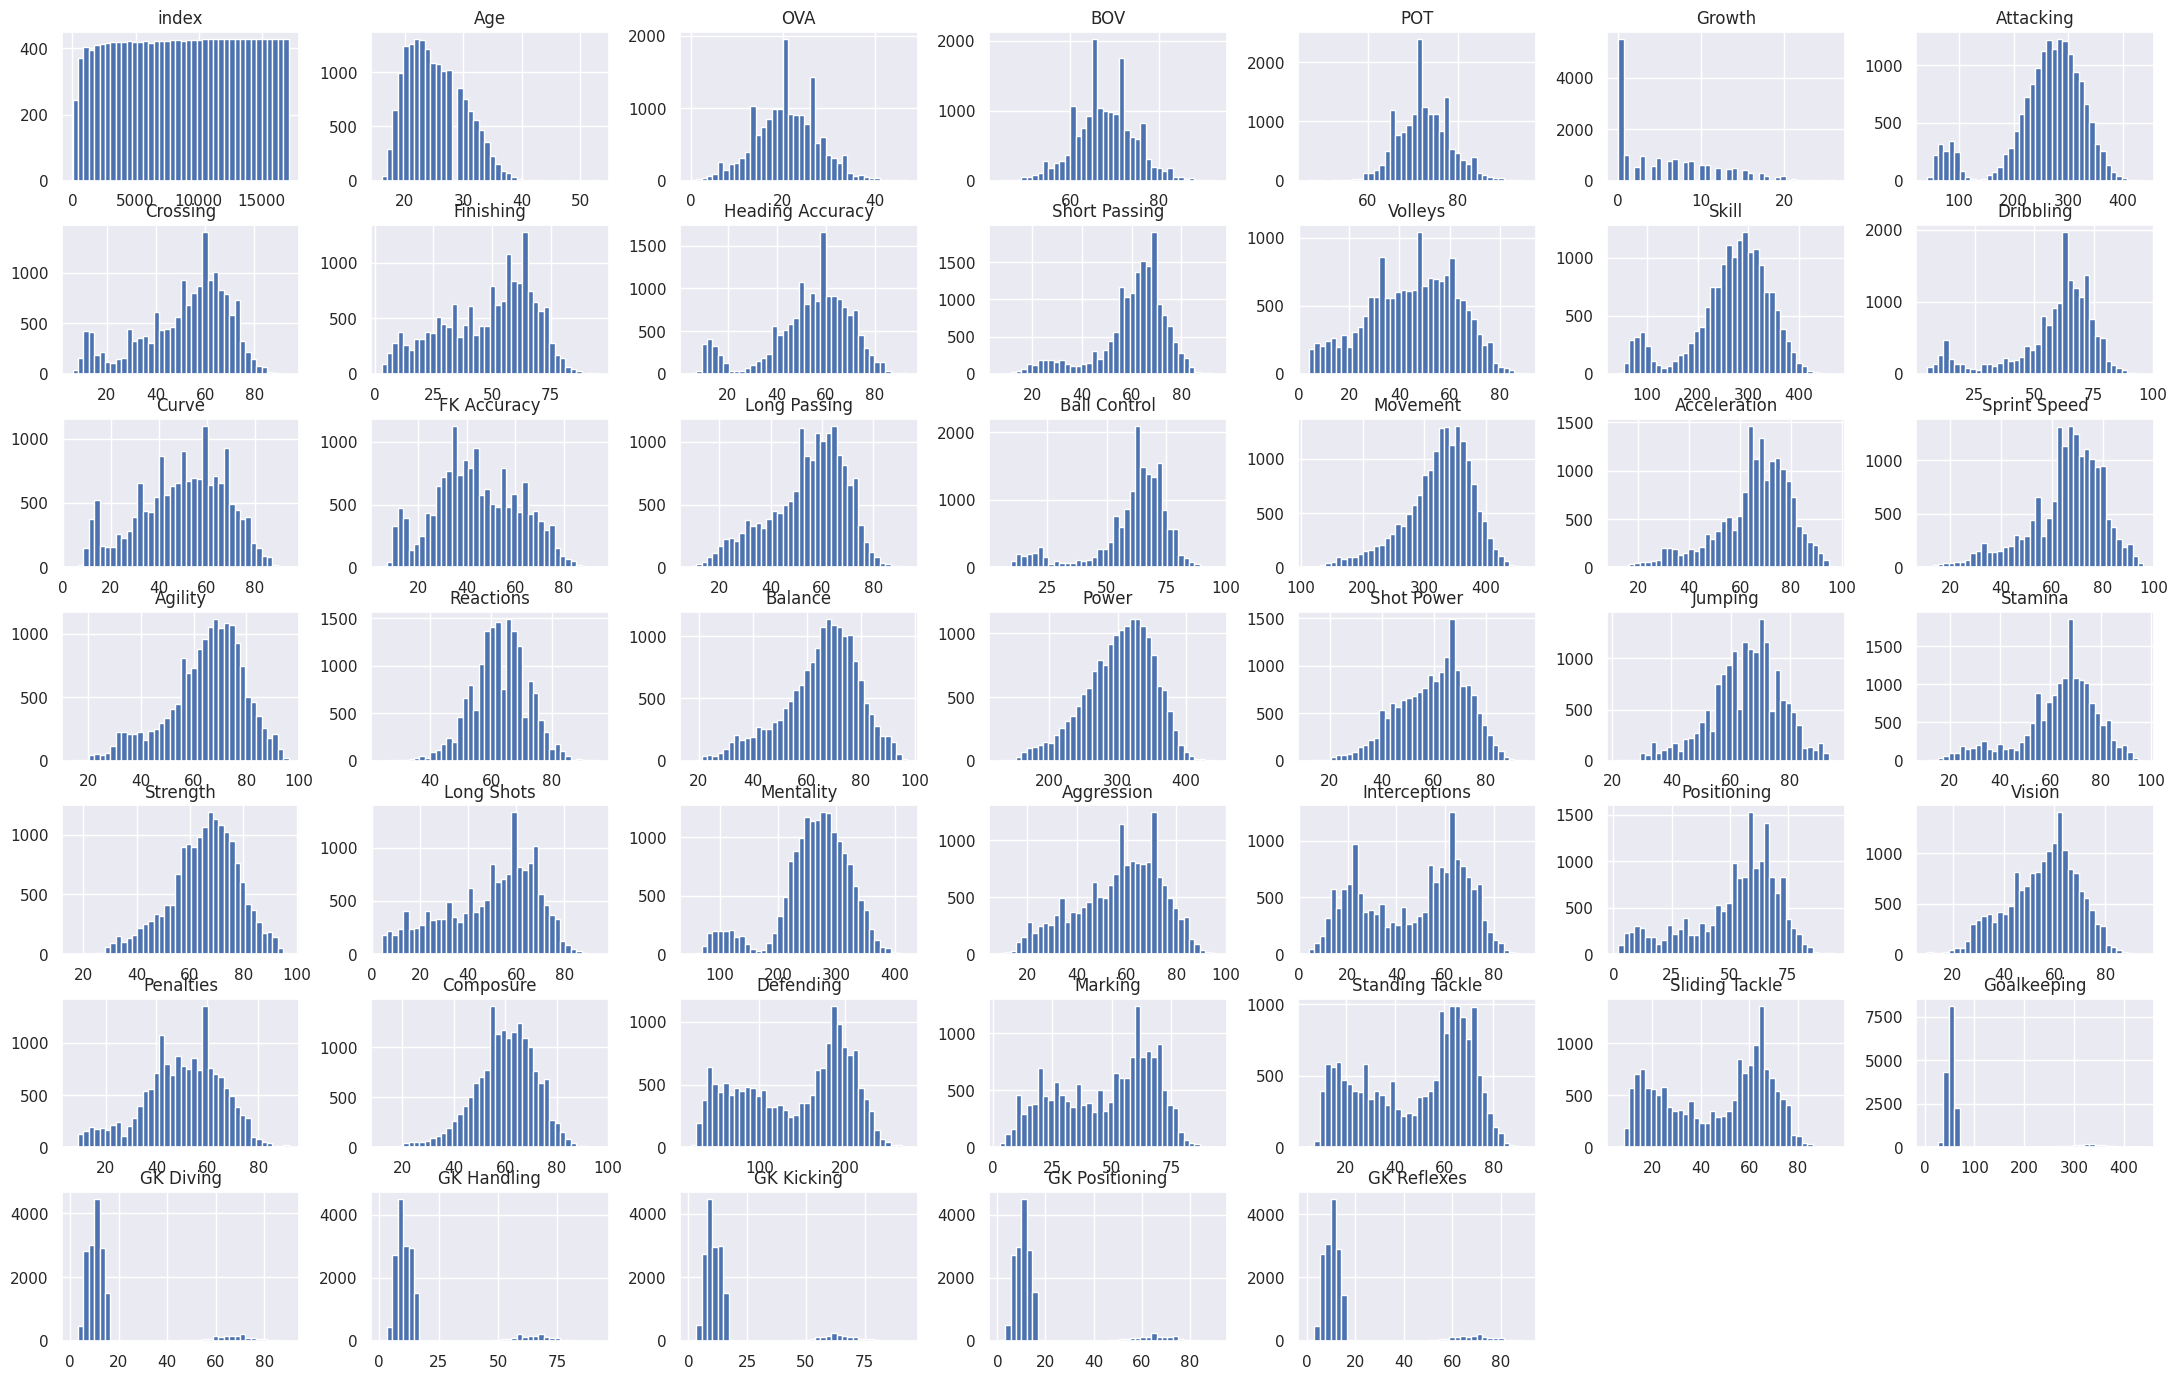

In [322]:
player_df.hist(bins=40, figsize=(27,17))
plt.show()

In [323]:
player_df.isna().any()

index               False
Age                 False
OVA                 False
BOV                 False
POT                 False
Growth              False
Attacking           False
Crossing            False
Finishing           False
Heading Accuracy    False
Short Passing       False
Volleys             False
Skill               False
Dribbling           False
Curve               False
FK Accuracy         False
Long Passing        False
Ball Control        False
Movement            False
Acceleration        False
Sprint Speed        False
Agility             False
Reactions           False
Balance             False
Power               False
Shot Power          False
Jumping             False
Stamina             False
Strength            False
Long Shots          False
Mentality           False
Aggression          False
Interceptions       False
Positioning         False
Vision              False
Penalties           False
Composure           False
Defending           False
Marking     

In [324]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(player_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(player_df))

Length of training data: 13361
Length of testing data: 3341
Length of total data: 16702


In [325]:
fifa_df = train_set.copy()
corr_matrix = fifa_df.corr()
corr_matrix['OVA'].sort_values(ascending=False)

OVA                 1.000000
BOV                 0.985848
Reactions           0.871562
Composure           0.702625
POT                 0.581866
Power               0.553114
Shot Power          0.537585
Age                 0.512066
Vision              0.506029
Mentality           0.495813
Short Passing       0.491423
Long Passing        0.483887
Skill               0.443329
Attacking           0.430995
Ball Control        0.430314
Curve               0.398544
Long Shots          0.390907
Crossing            0.388729
Aggression          0.386612
FK Accuracy         0.367367
Volleys             0.358890
Dribbling           0.353905
Stamina             0.348385
Positioning         0.337293
Strength            0.336365
Movement            0.311595
Penalties           0.309307
Interceptions       0.308416
Heading Accuracy    0.304024
Finishing           0.301626
Marking             0.295108
Jumping             0.263184
Defending           0.256535
Standing Tackle     0.244659
Agility       

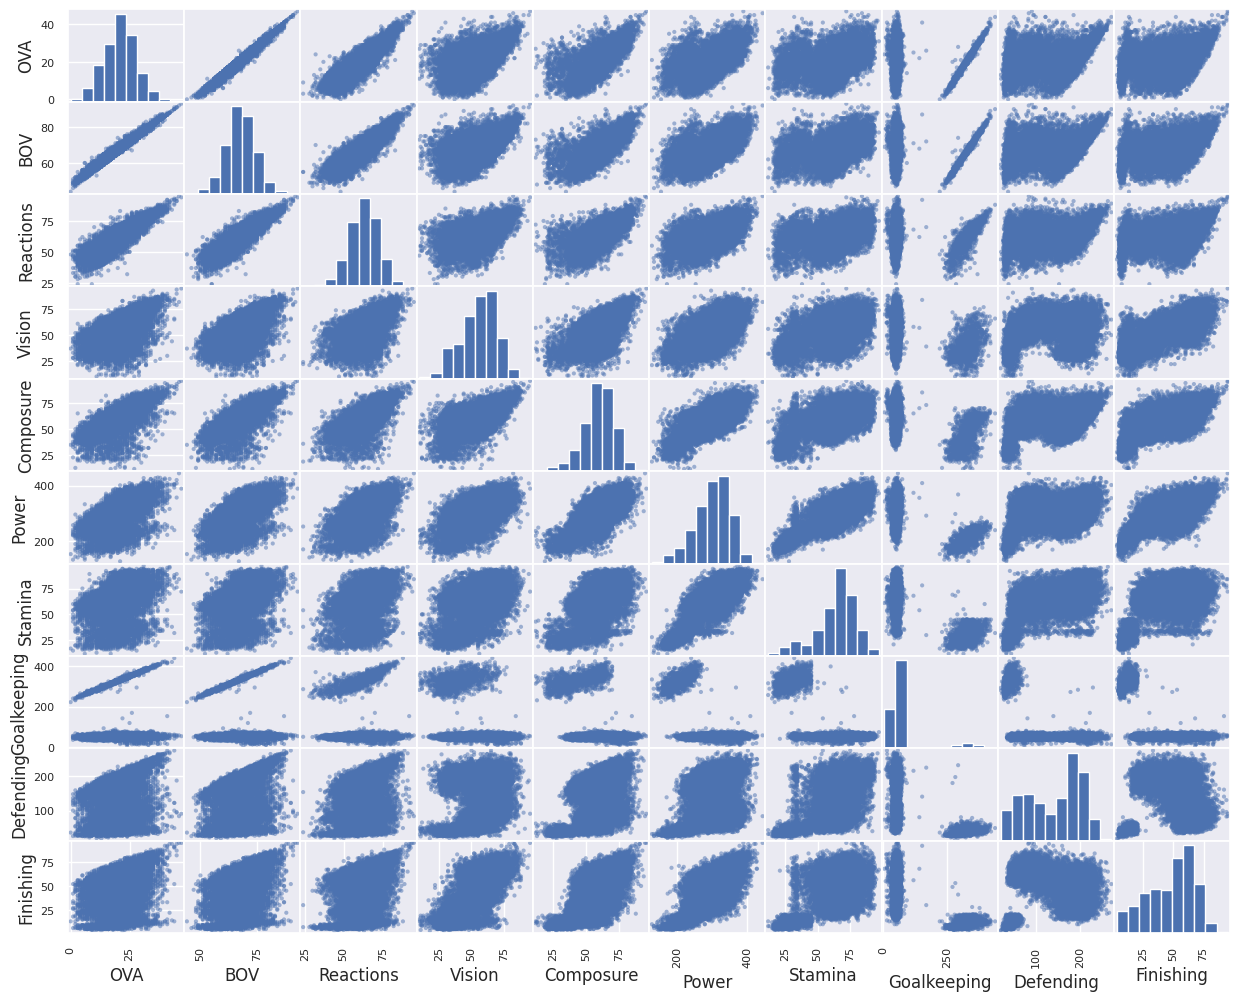

In [326]:
from pandas.plotting import scatter_matrix
attributes = ['OVA', 'BOV', 'Reactions', 'Vision', 'Composure','Power','Stamina','Goalkeeping','Defending','Finishing']
scatter_matrix(fifa_df[attributes], figsize=(15,12))
plt.show()

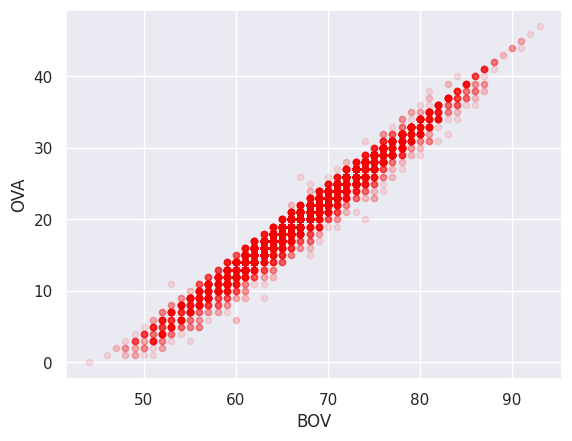

In [343]:
fifa_df.plot(kind='scatter', x='BOV', y='OVA', alpha=0.1, color='red')
plt.show()

In [328]:
y_train = train_set['OVA']
X_train = train_set.drop('OVA', axis=1)
y_test = test_set['OVA']
X_test = test_set.drop('OVA', axis=1)

In [329]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [330]:
from sklearn.metrics import mean_squared_error
y_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.008626716511100354

In [331]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [332]:
y_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, y_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [333]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [334]:
y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.2623373717934086

In [335]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())
display_scores(lin_reg_scores)

Scores: [0.0007473  0.00072653 0.02735878 0.00071436 0.00073601 0.00071092
 0.00071995 0.00070802 0.00075267 0.00070959]
Mean: 0.0033884152374374483
Standard Deviation: 0.00799013658130104


In [336]:
scores = cross_val_score(tree_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
tree_scores = np.sqrt(-scores)
display_scores(tree_scores)

Scores: [0.96769046 1.01559693 1.00373554 1.03313371 0.96998364 1.00485349
 0.99097726 1.01412184 0.98946547 0.98187161]
Mean: 0.9971429958290473
Standard Deviation: 0.019905608053213987


In [337]:
scores = cross_val_score(forest_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-scores)
display_scores(forest_scores)


Scores: [0.6865363  0.69824046 0.72115624 0.77111495 0.71138638 0.70472826
 0.68186315 0.70039996 0.705213   0.66473122]
Mean: 0.7045369906278023
Standard Deviation: 0.026899108984479256


In [338]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [339]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [340]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [341]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.7953362679864191

In [342]:
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([0.76521465, 0.82435799])